# Analysis_Challenge_Assignment_3_Siyuan_Gu

### Prepare for packages and importing dataset

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
os.chdir('C:/Users/gusiy/Desktop/HUDK4050EDM/ACA3_dataset')

In [12]:
college = pd.read_csv("CollegeScoreCard.csv", low_memory=False)

And we import some packages that are related to identify clusters.

In [5]:
import sklearn
print(sklearn.__version__)

0.23.2


In [7]:
conda install -c districtdatalabs yellowbrick

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\gusiy\anaconda3

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    matplotlib-3.4.3           |   py38haa95532_0          29 KB
    matplotlib-base-3.4.3      |   py38h49ac443_0         5.5 MB
    more-itertools-8.10.0      |     pyhd3eb1b0_0          47 KB
    munkres-1.1.4              |             py_0          13 KB
    pytest-6.2.4               |   py38haa95532_2         440 KB
    ------------------------------------------------------------
                                           Total:         6.7 MB

The following NEW packages will be INSTALLED:

  atomicwrites       pkgs/main/noarch::atomicwrites-1.4.0-py_0
  brotli             pkgs/main/win-64::brotli-1.0.9-ha925a31_2
  cycl

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## 1.Clean up dataset

According to what I have done from ACA1, I would like to defined the **graduation rate** as **C150_M**(max of C150_4 and C150_L4);**diversity** the sum of different races(by adding up UGD races through excel), by the definition of the documention.

Then we pick the specific data we need.

In [13]:
Score_Selected = college[['UNITID','COSTT4_A','Diversity','C150_M']]
Score_Selected

,UNITID,COSTT4_A,Diversity,C150_M
0,100654,18888.0,0.0135,0.2914
1,100663,19990.0,0.1293,0.5377
2,100690,12300.0,0.0186,0.6667
3,100706,20306.0,0.1339,0.4835
4,100724,17400.0,0.0416,0.2517
...,...,...,...,...
7799,48285703,NaN,NaN,0.0000
7800,48285704,NaN,NaN,0.0000
7801,48285705,NaN,NaN,0.0000
7802,48285706,NaN,NaN,0.0000


We delete the NaN values for nonsense.

In [14]:
Score_Selected = Score_Selected.dropna(axis =0, how = 'any')

In [15]:
Score_Selected

,UNITID,COSTT4_A,Diversity,C150_M
0,100654,18888.0,0.0135,0.2914
1,100663,19990.0,0.1293,0.5377
2,100690,12300.0,0.0186,0.6667
3,100706,20306.0,0.1339,0.4835
4,100724,17400.0,0.0416,0.2517
...,...,...,...,...
7373,482857,20964.0,0.0386,0.1995
7374,482954,24330.0,0.3149,0.0000
7378,483045,8532.0,0.0451,0.3062
7381,483124,19666.0,0.2741,0.0000


p.s. I would like to also include the income of the graduations from each college but there are too many Na values in our dataset(we've got no enough data for incomce after students are graduated).

## 2.Find out potential clusters

We want to find out the potential clusters of cost and diversity toward graduation rate. 

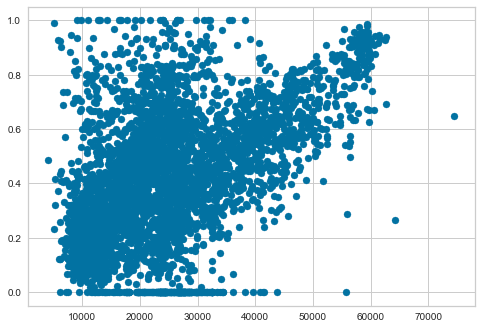

In [17]:
plt.scatter(Score_Selected['COSTT4_A'], Score_Selected['C150_M']);

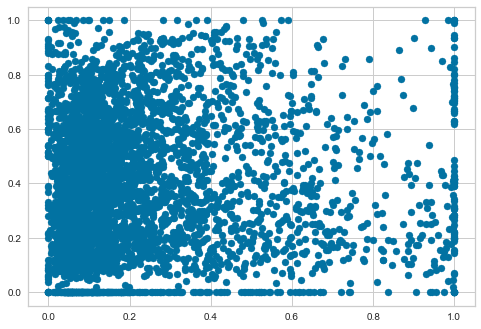

In [18]:
plt.scatter(Score_Selected['Diversity'], Score_Selected['C150_M']);

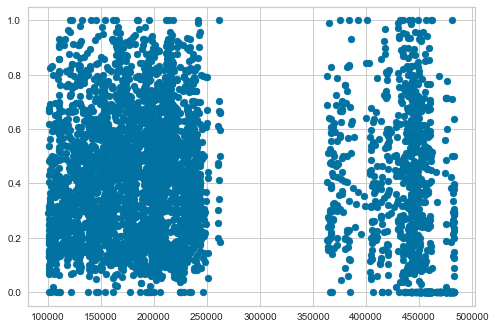

In [19]:
plt.scatter(Score_Selected['UNITID'], Score_Selected['C150_M']);

Obviously the unitid could be divided to two clusters, so let's do **K-means** method for the others.

In [24]:
Score_Clean = Score_Selected.drop(columns=['UNITID'])

In [25]:
Score_Clean

,COSTT4_A,Diversity,C150_M
0,18888.0,0.0135,0.2914
1,19990.0,0.1293,0.5377
2,12300.0,0.0186,0.6667
3,20306.0,0.1339,0.4835
4,17400.0,0.0416,0.2517
...,...,...,...
7373,20964.0,0.0386,0.1995
7374,24330.0,0.3149,0.0000
7378,8532.0,0.0451,0.3062
7381,19666.0,0.2741,0.0000


In [26]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Score_Clean)
cluster = kmeans.predict(Score_Clean)

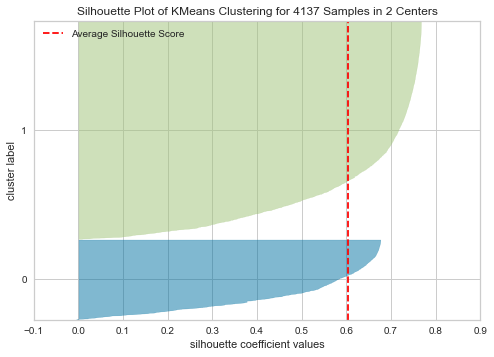

Silhouetter Score: 0.6036472769903917


In [28]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(kmeans, Score_Clean, colors='yellowbrick')

silhouetteScore = silhouette_score(Score_Clean, cluster, metric='euclidean')

print('Silhouetter Score:', silhouetteScore)

Or we can try 3 and 4 clusters to compare the **Silhouetter score**.

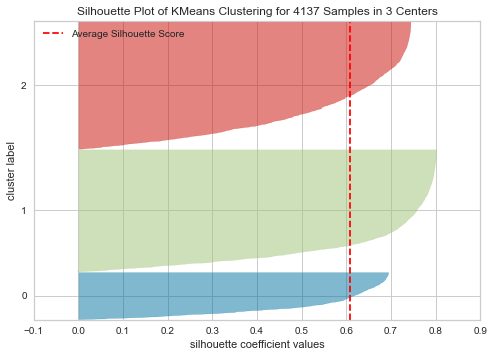

Silhouetter Score: 0.6080530252370603


In [75]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(Score_Clean)
cluster3 = kmeans3.predict(Score_Clean)
silhouette_visualizer(kmeans3, Score_Clean, colors='yellowbrick')
silhouetteScore3 = silhouette_score(Score_Clean, cluster3, metric='euclidean')
print('Silhouetter Score:', silhouetteScore3)

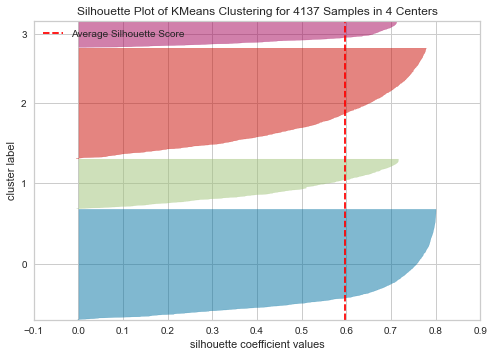

Silhouetter Score: 0.5975489323299441


In [76]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(Score_Clean)
cluster4 = kmeans4.predict(Score_Clean)
silhouette_visualizer(kmeans4, Score_Clean, colors='yellowbrick')
silhouetteScore4 = silhouette_score(Score_Clean, cluster4, metric='euclidean')
print('Silhouetter Score:', silhouetteScore4)

Hence, we could pick the 3 clusters as our ideal example.

## 3. Attain the result

Since we decide to pick the cluster 3 model, we would like to join the result into our selected dataset.

In [100]:
threecluster = Score_Selected.copy(deep=True)

threecluster['Cluster'] = cluster3

threecluster

,UNITID,COSTT4_A,Diversity,C150_M,Cluster
0,100654,18888.0,0.0135,0.2914,1
1,100663,19990.0,0.1293,0.5377,1
2,100690,12300.0,0.0186,0.6667,1
3,100706,20306.0,0.1339,0.4835,2
4,100724,17400.0,0.0416,0.2517,1
...,...,...,...,...,...
7373,482857,20964.0,0.0386,0.1995,2
7374,482954,24330.0,0.3149,0.0000,2
7378,483045,8532.0,0.0451,0.3062,1
7381,483124,19666.0,0.2741,0.0000,1


## 4. Summary

Since the **Silhouette Score** of our cluster is around 0.608, we can say that it is somehow reliable. In general speak, the cost of college would like to negatively influence the graduation rate(the more the cost is, the less the graduation rate could be). But for what I have seen, international students will pay more tuition fee and health insurance than local students. They affect the balance of income and expenditure of the college.(As international students have to offer proof of asset, they are able to make sure that they can afford their tuition for finish their degree) Therefore they reduce the cost of local students(major part of each college). So the diversity balances the negative influence of the graduation.

Hence, our clusters do help students and their parents to pick their ideal college according to a balanced level of cost, diversity, and graduation rate.